# Normality tests on the ASCAD database.

In [172]:
import numpy as np
import seaborn as sns

from statsmodels.stats.diagnostic import lilliefors
from tqdm import tqdm

from src.tools.traceloader import ASCAD, TraceCategory

sns.set_style("whitegrid")

In [49]:
ascad = ASCAD()

In [99]:
a = ascad.default.profile.filter_traces(0) + 128

a.shape[1]

1400

### Lilliefors test for normality

If the p-value is lower than some threshold, e.g. 0.05, then we can reject the Null hypothesis that the sample comes
from a normal distribution.

100%|██████████| 256/256 [02:49<00:00,  1.51it/s]


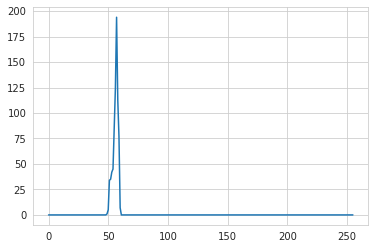

In [173]:
LIL_P_VALUE = .05

def normality(tc: TraceCategory):
    res = []
    for k in tqdm(range(256)):
        key = np.moveaxis(tc.filter_traces(k), 0, -1) + 128

        if k == 0:
            # Plot the 50th sample point distribution of the first key.
            sns.lineplot(data=np.bincount(key[50], minlength=256))

        pvs = np.array([lilliefors(sp, dist='norm')[1] for sp in key])
        res.append(np.sum(pvs > LIL_P_VALUE))

    return res

norm_ps = normality(ascad.default.profile)

In [175]:
print(f"{sum(norm_ps)} out of {1400 * 256} datapoints are likely to be normally "
      f"distributed.")

59 out of 358400 datapoints are likely to be normally distributed.


## Experiments
### Normality and sliding window

In [ ]:
sw_size = 2
sw = np.empty((a.shape[0], a.shape[1]))

def pad_a(i, sliding_window_size):
    return np.pad(a, ((0,0), (i, sliding_window_size - i - 1)), 'constant', constant_values=np.nan)

pad_raw = np.array([pad_a(i, sw_size) for i in range(sw_size)])

mv_a = np.moveaxis(a, 0, -1)
mv_sw = np.moveaxis(pad_raw.reshape(-1, pad_raw.shape[-1]), 0, -1)

In [ ]:
mv_sw.shape

In [ ]:
sns.lineplot(data=np.bincount(mv_sw[5:1400][2], minlength=256))

In [ ]:
sns.lineplot(data=np.array([lilliefors(sp, dist='norm')[1] for sp in mv_a]))